<a href="https://colab.research.google.com/github/FauzanNR/DataAnalysisDicoding/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# E-Comerce Public Data Analysis

- **Nama:** Fauzan Nur Rifai
- **Email:** fauzannur.rifai.fnr@gmail.com
- **ID Dicoding:** fauzannurrifai

# Business Questions
- Wich region gave the most revenue?
- Are there specific times in all regions when customers make the most purchase ?
- What are the most purchased products?
- Which seller make the most selling?



# Importing Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


pd.set_option('display.width', None)       # Avoid truncation

# Data Wrangling

## Data Gathering

In [2]:
customers_df = pd.read_csv("Data/E-Commerce-Public-Dataset/customers_dataset.csv")
orders_df = pd.read_csv("Data/E-Commerce-Public-Dataset/orders_dataset.csv")
geolocation_df = pd.read_csv("Data/E-Commerce-Public-Dataset/geolocation_dataset.csv")
order_items_df = pd.read_csv("Data/E-Commerce-Public-Dataset/order_items_dataset.csv")
order_payments_df = pd.read_csv("Data/E-Commerce-Public-Dataset/order_payments_dataset.csv")
sellers_df = pd.read_csv("Data/E-Commerce-Public-Dataset/sellers_dataset.csv")
products_df = pd.read_csv("Data/E-Commerce-Public-Dataset/products_dataset.csv")
products_translation_df = pd.read_csv("Data/E-Commerce-Public-Dataset/product_category_name_translation.csv")

In [3]:
customers_df.name = "Customers"
orders_df.name = "Orders"
geolocation_df.name = "Geolocations"
order_items_df.name = "Order Items"
order_payments_df.name = "Order Payments"
sellers_df.name = "Sellers"
products_df.name = "Products"
products_translation_df.name = "Translated Product"
df_list = [ customers_df, orders_df, geolocation_df, order_items_df, order_payments_df, sellers_df, products_df, products_translation_df]

In [4]:
for data in df_list:
    print(f"###Data {data.name} Info###")
    data.info()

###Data Customers Info###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
###Data Orders Info###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_p

##Data Assesment

In [5]:
for data in df_list:
    print(f"###{data.name}###")
    print("---Missing Data---")
    print(data.isna().sum())

    print("---Duplicated Data---")
    print(data.duplicated().sum())

    print("---Data Desc---")
    print(data.describe())

###Customers###
---Missing Data---
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
---Duplicated Data---
0
---Data Desc---
       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000
###Orders###
---Missing Data---
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
---Duplicated Data---
0
---Data Desc---
                                order_id                       customer_id  \
count  

##Data Cleaning

In [6]:
#Duplicated Data

for data in df_list:
    print(f"###{data.name}###")
    print(data.duplicated().sum())
    data.drop_duplicates(inplace=True)
    print(data.duplicated().sum())

###Customers###
0
0
###Orders###
0
0
###Geolocations###
261831
0
###Order Items###
0
0
###Order Payments###
0
0
###Sellers###
0
0
###Products###
0
0
###Translated Product###
0
0


In [7]:
#Order missing value
# order_approved_at                 160
# order_delivered_carrier_date     1783
# order_delivered_customer_date    2965
orders_df.order_status.value_counts()


delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [8]:
#checking approved and delivered order but missing value
def order_approvement_missing():
    order_approved_null_status = orders_df[orders_df["order_approved_at"].isna() & orders_df["order_status"]]
    return order_approved_null_status.order_status.value_counts()

order_approvement_missing()

canceled     141
delivered     14
created        5
Name: order_status, dtype: int64

In [9]:
#Convert to datetime
datetime_column = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
for column in datetime_column:
    orders_df[column] = pd.to_datetime(orders_df[column], errors="coerce")

In [10]:
#get average approvement time
approved_notna = (orders_df["order_approved_at"].notna() &  orders_df["order_purchase_timestamp"].notna()
                  & (orders_df["order_status"] == "delivered")
                  )
order_approvement_delay = (orders_df.loc[approved_notna, "order_approved_at"] - orders_df.loc[approved_notna, "order_purchase_timestamp"])
avg_approvement = order_approvement_delay.mean()
print(avg_approvement)

0 days 10:16:36.361243572


In [11]:
orders_df.loc[order_approvement_delay.idxmax()]

order_id                         0a93b40850d3f4becf2f276666e01340
customer_id                      a70076d8d4bfce15f8081951c43bf187
order_status                                            delivered
order_purchase_timestamp                      2018-01-20 14:24:50
order_approved_at                             2018-02-20 11:51:27
order_delivered_carrier_date                  2018-02-21 19:34:13
order_delivered_customer_date                 2018-03-02 22:37:49
order_estimated_delivery_date                 2018-02-23 00:00:00
Name: 96251, dtype: object

In [12]:
delivered_missing_approvement = (((orders_df["order_status"] == "delivered") | (orders_df["order_status"] == "canceled") ) & (orders_df["order_approved_at"].isna()) & (orders_df["order_purchase_timestamp"]+avg_approvement < orders_df["order_delivered_carrier_date"]))

orders_df.loc[delivered_missing_approvement]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaT,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaT,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaT,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaT,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaT,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaT,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaT,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20


In [13]:
orders_df.loc[delivered_missing_approvement, "order_approved_at"] = (orders_df.loc[delivered_missing_approvement, "order_purchase_timestamp"]+avg_approvement).dt.floor("S")

In [14]:
orders_df.loc[delivered_missing_approvement]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,2017-02-19 00:56:36,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,2017-02-18 23:02:07,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,2017-02-18 23:46:23,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,2017-02-19 03:05:11,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,2017-02-17 23:22:31,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,2017-01-19 23:04:44,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,2017-02-19 11:45:23,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,2017-02-18 21:20:55,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,2017-01-20 08:43:35,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,2017-02-18 03:38:31,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20


In [15]:
order_approvement_missing()

canceled    141
created       5
Name: order_status, dtype: int64

Delivered but missing order_delivered_carrier_date and order_delivered_customer_date

In [16]:
delivered_missing_carrier_customer = (orders_df["order_delivered_carrier_date"].isna()
                                      & orders_df["order_delivered_customer_date"].isna()
                                      & (orders_df["order_status"] == "delivered"))

orders_df.loc[delivered_missing_carrier_customer]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23


In [17]:
#avg order_delivered_carrier_date

delivered_notna =orders_df[orders_df["order_delivered_carrier_date"].notna() & orders_df["order_delivered_customer_date"].notna()
                   & (orders_df["order_status"] == "delivered")]

order_delivered_carrier_date_delay = (delivered_notna["order_delivered_carrier_date"] - delivered_notna["order_approved_at"])

avg_order_delivered_carrier_date =order_delivered_carrier_date_delay.mean()
avg_order_delivered_carrier_date

Timedelta('2 days 19:10:56.833666773')

Assignin delivered order with missing approvement data

In [18]:
orders_df.loc[delivered_missing_carrier_customer, "order_delivered_carrier_date"] = (orders_df.loc[delivered_missing_carrier_customer, "order_approved_at"]+avg_order_delivered_carrier_date).dt.floor("S")

In [19]:
orders_df.loc[delivered_missing_carrier_customer]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,2017-05-28 18:41:12,NaT,2017-06-23


In [20]:
carrier_to_estimated = (orders_df.loc[delivered_missing_carrier_customer, "order_estimated_delivery_date"] - orders_df.loc[delivered_missing_carrier_customer, "order_delivered_carrier_date"] )
median_date = carrier_to_estimated/2
median_date

92643   12 days 14:39:24
dtype: timedelta64[ns]

In [21]:
orders_df.loc[delivered_missing_carrier_customer, "order_delivered_customer_date"] = (orders_df.loc[delivered_missing_carrier_customer, "order_delivered_carrier_date"]+median_date).dt.floor("S")

In [22]:
orders_df.loc[delivered_missing_carrier_customer]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,2017-05-28 18:41:12,2017-06-10 09:20:36,2017-06-23


another more

notna_but_delivered

In [23]:
notna_but_delivered =((orders_df["order_status"] == "delivered"))

orders_df.loc[notna_but_delivered].isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     1
order_delivered_customer_date    7
order_estimated_delivery_date    0
dtype: int64

Delivered orders with missing order_delivered_customer_date

In [24]:
isna_order_delivered_customer_date =((orders_df["order_status"] == "delivered")
                  & orders_df["order_delivered_customer_date"].isna())

orders_df.loc[isna_order_delivered_customer_date]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaT,2018-07-24
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaT,2018-06-26
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaT,2018-07-19


In [25]:
orders_df.loc[isna_order_delivered_customer_date, "order_delivered_customer_date"] = (orders_df.loc[isna_order_delivered_customer_date, "order_delivered_carrier_date"]
                                                                                                     +((orders_df.loc[isna_order_delivered_customer_date, "order_estimated_delivery_date"] - orders_df.loc[isna_order_delivered_customer_date, "order_delivered_carrier_date"])/2)
                                                                                                     ).dt.floor("S")


In [26]:
orders_df.loc[isna_order_delivered_customer_date]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,2017-12-09 09:06:11,2017-12-18
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,2018-07-05 16:02:30,2018-07-16
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,2018-07-16 18:58:30,2018-07-30
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,2018-07-16 18:58:30,2018-07-30
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,2018-07-13 16:44:00,2018-07-24
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,2018-06-19 07:05:00,2018-06-26
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,2018-07-11 09:43:00,2018-07-19


Delivered orders with missing order_delivered_carrier_date

In [27]:
isna_order_delivered_carrier_date =((orders_df["order_status"] == "delivered")
                  & orders_df["order_delivered_carrier_date"].isna()
)

orders_df.loc[isna_order_delivered_carrier_date]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
73222,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,NaT,2017-11-20 19:44:47,2017-11-14


In [28]:
orders_df.loc[isna_order_delivered_carrier_date, "order_delivered_carrier_date"] = (
    orders_df.loc[isna_order_delivered_carrier_date, "order_approved_at"]+avg_order_delivered_carrier_date
).dt.floor("S")

In [29]:
orders_df.loc[isna_order_delivered_carrier_date]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
73222,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,2017-10-02 04:18:12,2017-11-20 19:44:47,2017-11-14


In [30]:
notna_but_delivered =((orders_df["order_status"] == "delivered"))

orders_df.loc[notna_but_delivered].isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [31]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 146
order_delivered_carrier_date     1781
order_delivered_customer_date    2957
order_estimated_delivery_date       0
dtype: int64

In [32]:
orders_df.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [33]:
for order_stat in orders_df['order_status'].unique():
    print(f"==={order_stat}===")
    orders = orders_df[orders_df['order_status'] == order_stat]

    print(f"{orders.isna().sum()}")

===delivered===
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64
===invoiced===
order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     314
order_delivered_customer_date    314
order_estimated_delivery_date      0
dtype: int64
===shipped===
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date    1107
order_estimated_delivery_date       0
dtype: int64
===processing===
order_id           

Product missing data

In [34]:
products_df["product_category_name"].value_counts()

cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_category_name, Length: 73, dtype: int64

In [35]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [36]:
products_df["product_weight_g"].fillna(products_df["product_weight_g"].median(), inplace=True)
products_df["product_length_cm"].fillna(products_df["product_length_cm"].median(), inplace=True)
products_df["product_height_cm"].fillna(products_df["product_height_cm"].median(), inplace=True)
products_df["product_width_cm"].fillna(products_df["product_width_cm"].median(), inplace=True)


In [37]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


In [38]:
products_df["product_category_name"].fillna("unknown", inplace=True)

In [39]:
products_df["product_name_lenght"].fillna(products_df["product_name_lenght"].mean(), inplace=True)

In [40]:
products_df["product_description_lenght"].fillna(products_df["product_description_lenght"].mean(), inplace=True)

In [41]:
products_df["product_photos_qty"].fillna(products_df["product_photos_qty"].mean(), inplace=True)

In [42]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

Insight:
- Missing data in orders_df was quite complicated but, I concluded that all orders with delivered status must not contain null data but in reverse of the other order statuses, for example shipped, processing, cancled orders does not need order_delivered_customer_date.
- Product with with missing data mark as unknown data though the original data is in portugis languange
- product_name_lenght, product_description_lenght and product_photos_qty filled with mean data.


# Exploratory Data Analysis

## Exporting all DataFrame

In [43]:
all_df = pd.merge(customers_df, orders_df, on='customer_id', how='left')
all_df = pd.merge(all_df, order_items_df, on='order_id', how='left')
all_df = pd.merge(all_df, order_payments_df, on='order_id', how='left')
all_df = pd.merge(all_df, sellers_df, on='seller_id', how='left')
all_df = pd.merge(all_df, products_df, on='product_id', how='left')
all_df = pd.merge(all_df, products_translation_df, on='product_category_name', how='left')

all_df.head(5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,SP,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,SC,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,SP,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,SP,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,SP,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,home_confort


In [44]:
all_df.to_csv("all_data.csv", index=False)

## Order and Region Revenue

grouping and sorting customer state and payment

In [45]:
state_revenue = all_df.groupby(by='customer_state')['payment_value'].sum().reset_index()
state_revenue = state_revenue.sort_values(by='payment_value', ascending=False)

## Region rank based on revenue or payment value

In [46]:
state_revenue

,customer_state,payment_value
25,SP,7673188.55
18,RJ,2783724.26
10,MG,2341861.47
22,RS,1152019.17
17,PR,1074614.19
4,BA,802416.72
23,SC,799135.92
8,GO,516182.51
6,DF,434512.55
7,ES,406946.26


## Revenue and Purchase Trend

Revenue in Daily interval

In [47]:
all_df['order_date'] = all_df['order_purchase_timestamp'].dt.date

revenue_trend =all_df.groupby(by=['order_date'])['payment_value'].sum().reset_index()
revenue_trend = revenue_trend.sort_values(by='order_date', ascending=True)
revenue_trend


,order_date,payment_value
0,2016-09-04,272.46
1,2016-09-05,75.06
2,2016-09-13,40.95
3,2016-09-15,0.00
4,2016-10-02,109.34
...,...,...
629,2018-09-29,137.03
630,2018-10-01,80.38
631,2018-10-03,197.55
632,2018-10-16,222.03


Peak Day Revenue

In [48]:
peak_revenue = revenue_trend['payment_value'].max()
peak_date = revenue_trend.loc[revenue_trend['payment_value']== peak_revenue, 'order_date'].values[0]

peak_date

datetime.date(2017, 11, 24)

Revenue trend in quartal

In [49]:
revenue_trend['order_date'] = pd.to_datetime(revenue_trend['order_date'])


revenue_quartal = revenue_trend.resample('Q', on='order_date').sum().reset_index()
revenue_quartal

,order_date,payment_value
0,2016-09-30,388.47
1,2016-12-31,76139.79
2,2017-03-31,1083455.82
3,2017-06-30,1850800.02
4,2017-09-30,2643824.39
5,2017-12-31,3688532.05
6,2018-03-31,4206654.75
7,2018-06-30,4307642.75
8,2018-09-30,2612698.95
9,2018-12-31,589.67


Purchase trend in 24 Hours interval

In [50]:
all_df['order_hour'] = all_df['order_purchase_timestamp'].dt.hour
purchase_hour_trend = all_df.groupby(by='order_hour').size().reset_index(name='order_count_in_hour')
purchase_hour_trend


,order_hour,order_count_in_hour
0,0,2910
1,1,1369
2,2,616
3,3,326
4,4,254
5,5,226
6,6,571
7,7,1428
8,8,3523
9,9,5694


Peak puchase time

In [51]:
order_count_in_hour_max = purchase_hour_trend['order_count_in_hour'].max()
peak_time = purchase_hour_trend.loc[purchase_hour_trend['order_count_in_hour'] == order_count_in_hour_max, ['order_hour', 'order_count_in_hour']]
peak_time

,order_hour,order_count_in_hour
16,16,8039


## Ordered Product

In [52]:
most_purchased_product = all_df.groupby(by='product_category_name')['order_id'].count().reset_index().sort_values(by='order_id', ascending=False)
most_purchased_product.columns = ['product_category_name', 'total_purchase']
most_purchased_product = most_purchased_product.merge(products_translation_df[['product_category_name', 'product_category_name_english']],
                                                      on='product_category_name',
                                                      how='inner')
most_purchased_product.head(10)


,product_category_name,total_purchase,product_category_name_english
0,cama_mesa_banho,11823,bed_bath_table
1,beleza_saude,9975,health_beauty
2,esporte_lazer,8945,sports_leisure
3,moveis_decoracao,8744,furniture_decor
4,informatica_acessorios,8082,computers_accessories
5,utilidades_domesticas,7355,housewares
6,relogios_presentes,6201,watches_gifts
7,telefonia,4721,telephony
8,ferramentas_jardim,4574,garden_tools
9,automotivo,4379,auto


## Seller Rank

In [53]:
seller_order_delivered = all_df.loc[(all_df['order_status'] == 'delivered')]
top_ten_sellers = seller_order_delivered.groupby(by=['seller_id', 'seller_city','seller_state'])['order_id'].count().reset_index().sort_values(by='order_id', ascending=False)

In [54]:
top_ten_sellers.columns = ['seller_id','seller_city', 'seller_state', 'total_sales']
top_ten_sellers.head(10)

,seller_id,seller_city,seller_state,total_sales
858,4a3ca9315b744ce9f8e9374361493884,ibitinga,SP,2094
1190,6560211a19b47992c3666cc44a7e94c0,sao paulo,SP,2085
358,1f50f920176fa81dab994f9023523100,sao jose do rio preto,SP,2002
2388,cc419e0650a3c5ba77189a1882b7556a,santo andre,SP,1790
2543,da8622b14eb17ae2831f4ac5b9dab84a,piracicaba,SP,1633
1758,955fee9216a65b617aa5c0531780ce60,sao paulo,SP,1501
188,1025f0e2d44d7041d6cf58b6550e0bfa,sao paulo,SP,1454
1480,7c67e1448b00f6e969d365cea6b010ab,itaquaquecetuba,SP,1443
1450,7a67c85e85bb2ce8582c35f2203ad736,sao paulo,SP,1224
2725,ea8482cd71df3c1969d7b9473ff13abc,sao paulo,SP,1224


In [55]:
top_ten_sellers.seller_city.mode()

0    sao paulo
Name: seller_city, dtype: object

In [56]:
top_ten_seller_product = top_ten_sellers.merge(order_items_df[['seller_id','order_id','product_id']], on='seller_id',how='inner')
top_ten_seller_product = top_ten_seller_product.drop(columns=['seller_city', 'seller_state'])
top_ten_seller_product

,seller_id,total_sales,order_id,product_id
0,4a3ca9315b744ce9f8e9374361493884,2094,0006ec9db01a64e59a68b2c340bf65a7,99a4788cb24856965c36a24e339b6058
1,4a3ca9315b744ce9f8e9374361493884,2094,001c85b5f68d2be0cb0797afc9e8ce9a,84f456958365164420cfc80fbe4c7fab
2,4a3ca9315b744ce9f8e9374361493884,2094,001dbc16dc51075e987543d23a0507c7,777d2e438a1b645f3aec9bd57e92672c
3,4a3ca9315b744ce9f8e9374361493884,2094,0035246a40f520710769010f752e7507,8a6187b2665118d5095f99a25fd7ba7a
4,4a3ca9315b744ce9f8e9374361493884,2094,005059edee63c8c708ba61910793b31b,84f456958365164420cfc80fbe4c7fab
...,...,...,...,...
112439,ac9b01377919cdbd2a1bbb8d5837c70b,1,371d3a892917017b32ada644ba1f301d,eaa53c85856d19bc9f611f5628b4ce7b
112440,24c1de8d9551c0b4fbc53317d53efda8,1,a65d4ac927fef29da1b58e60ebdbb1d7,d34984353fa530831479ab9686c090e7
112441,3d2400ac620cffa23ac81bd192f7f555,1,8258f7e8bc8122521bed9d5c4c91a1c6,177b172621777704a3e39ac9d3568946
112442,3606774ec64634822d78dc2db6d37045,1,a8c3f65a43b2e956cbfca10db4300853,e08d86e1c599e2373d95380ac9a3ccc8


In [57]:
top_ten_seller_product_tier = top_ten_seller_product.groupby(by=['seller_id','total_sales','product_id'])\
.agg(
    product_order_count =('order_id', 'count')
).reset_index()
top_ten_seller_product_tier = top_ten_seller_product_tier.sort_values(by=['total_sales', 'product_order_count'], ascending=[False, False])
top_ten_seller_product_tier.head(10)


,seller_id,total_sales,product_id,product_order_count
9856,4a3ca9315b744ce9f8e9374361493884,2094,99a4788cb24856965c36a24e339b6058,482
9708,4a3ca9315b744ce9f8e9374361493884,2094,35afc973633aaeb6b877ff57b2793310,164
9830,4a3ca9315b744ce9f8e9374361493884,2094,84f456958365164420cfc80fbe4c7fab,109
9814,4a3ca9315b744ce9f8e9374361493884,2094,777d2e438a1b645f3aec9bd57e92672c,94
9787,4a3ca9315b744ce9f8e9374361493884,2094,64fb265487de2238627ce43fe8a67efc,72
9806,4a3ca9315b744ce9f8e9374361493884,2094,7340a3839a1de1e99d149b8cf052a2ec,44
9772,4a3ca9315b744ce9f8e9374361493884,2094,5bfc7506459ae2a7b4b573fe557a58e1,31
9994,4a3ca9315b744ce9f8e9374361493884,2094,f2e53dd1670f3c376518263b3f71424d,31
9735,4a3ca9315b744ce9f8e9374361493884,2094,404a57563d487aecbc2b1a01d9b89aab,27
9977,4a3ca9315b744ce9f8e9374361493884,2094,ec5b3c8bb77ad22278f6e9d719a83de3,26


In [58]:
top_one_product_id = top_ten_seller_product_tier['product_id'].iloc[0]
top_one_product_id

'99a4788cb24856965c36a24e339b6058'

In [59]:
top_one_product = products_df.loc[products_df['product_id']== top_one_product_id, 'product_category_name']
top_one_product

9661    cama_mesa_banho
Name: product_category_name, dtype: object

In [60]:
products_translation_df.loc[(products_translation_df['product_category_name']==top_one_product.values[0])]

,product_category_name,product_category_name_english
3,cama_mesa_banho,bed_bath_table


In [61]:
top_one_city = top_ten_sellers['seller_city'].head(2)
top_one_city

858      ibitinga
1190    sao paulo
Name: seller_city, dtype: object

# Visualization and Explainatory Analysis

## Wich region gave the most revenue?

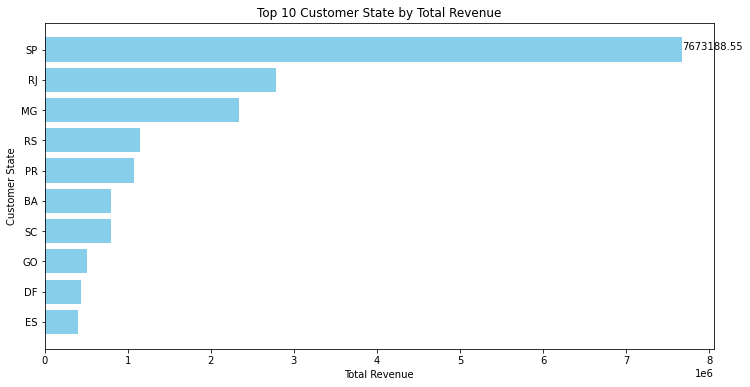

In [62]:
plt.figure(figsize=(12, 6))
plt.barh(state_revenue['customer_state'].head(10), state_revenue['payment_value'].head(10), color='skyblue')
plt.text(state_revenue['payment_value'].values[0], state_revenue['customer_state'].values[0], f"{state_revenue['payment_value'].values[0]}")
plt.xlabel('Total Revenue')
plt.ylabel('Customer State')
plt.title('Top 10 Customer State by Total Revenue')

plt.gca().invert_yaxis()
plt.show()


Insight:
- São Paulo(SP) becoming state with the highest revenue 7673188.55, which is no wonder because São Paulo is the most populated state in Brazil.
- Rio de Janeiro(RJ) as the third most populated state in Brazil is in the second position with highest revenue
- Minas Gerais(MG) the second most populated state in Brazil, ranks third in revenue instead


## Are there specific times in all regions when customers make the most purchase ?

daily revenue trend

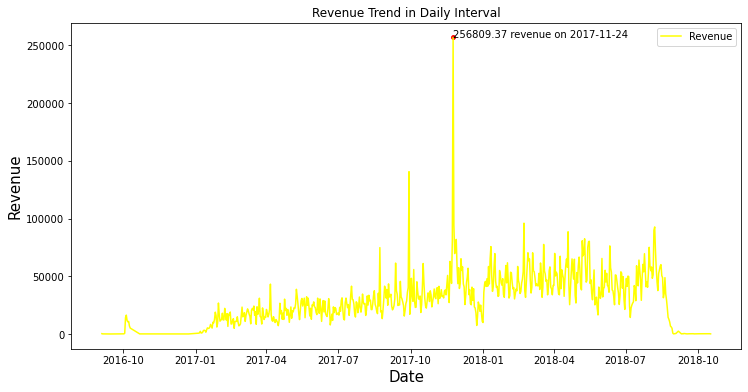

In [63]:
plt.figure(figsize=(12,6))
plt.plot(revenue_trend['order_date'], revenue_trend['payment_value'], label='Revenue', color = 'yellow')
plt.title('Revenue Trend in Daily Interval')
plt.xlabel('Date', size = 15)
plt.ylabel('Revenue', size=15)
plt.scatter(peak_date, peak_revenue, color='red', s=15)
plt.text(peak_date, peak_revenue, f"{peak_revenue} revenue on {peak_date}")
plt.legend()
plt.show()

Purchase trend in 24 Hour interval

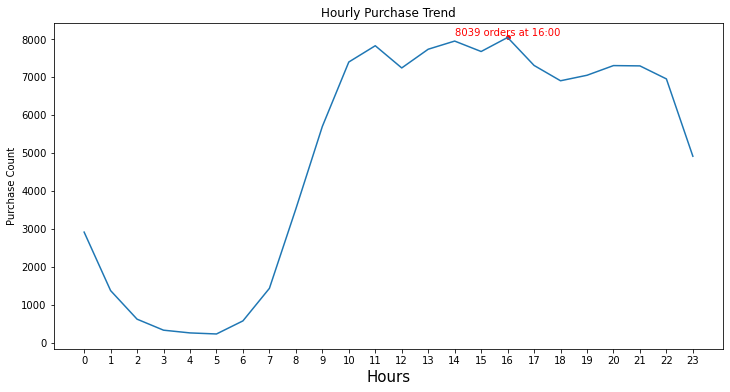

In [64]:
plt.figure(figsize=(12, 6))
plt.plot(purchase_hour_trend['order_hour'], purchase_hour_trend['order_count_in_hour'])
plt.title('Hourly Purchase Trend')
plt.xlabel('Hours',size=15)
plt.scatter(peak_time['order_hour'], peak_time['order_count_in_hour'], s=15, label='Peak Purchase', color='red')
plt.text(peak_time['order_hour'], peak_time['order_count_in_hour'], f"{order_count_in_hour_max} orders at {peak_time['order_hour'].values[0]}:00", fontsize=10, color='red', ha='center', va='bottom')
plt.xticks(range(0,24))
plt.ylabel('Purchase Count')
plt.show()

Insight:
- Daily revenue trend shows us the peak time is happened at 2017-11-24 highest revenue touching 256809.37 in accumulation from all state at that day.
- Peak time purchasing is at around 16:00 and it reach 8039 purchasement, the Up trend happened at around 6:00 - 7:00 mouring and continue until 11.00, side way movement occur or when it reach lunch time where most people scroll around with their handphone. Down trend start at around 21:00

## What are the most purchased products?

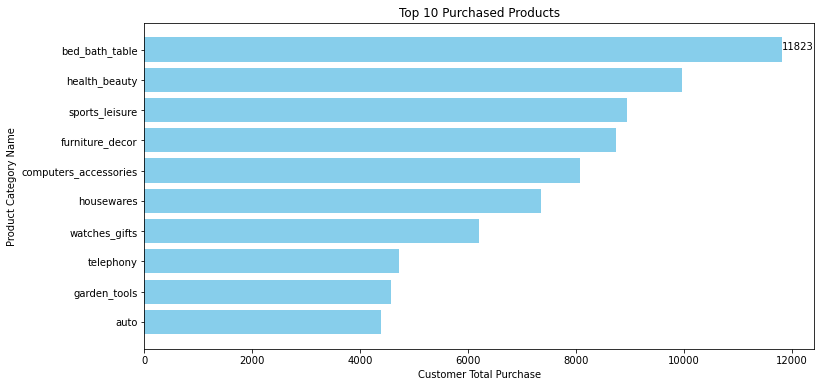

In [65]:
plt.figure(figsize=(12, 6))
plt.barh(most_purchased_product['product_category_name_english'].head(10), most_purchased_product['total_purchase'].head(10), color='skyblue')
plt.text(most_purchased_product['total_purchase'].values[0], most_purchased_product['product_category_name_english'].values[0], f"{most_purchased_product['total_purchase'].values[0]}")
plt.ylabel('Product Category Name')
plt.xlabel('Customer Total Purchase')
plt.title('Top 10 Purchased Products')

plt.gca().invert_yaxis()
plt.show()


Insight:
- Apperntly people love Cama mesa banho or bed bath and table with 11823 purchasement
- These top ten products mostly are home equipment


## Which seller make the most selling?

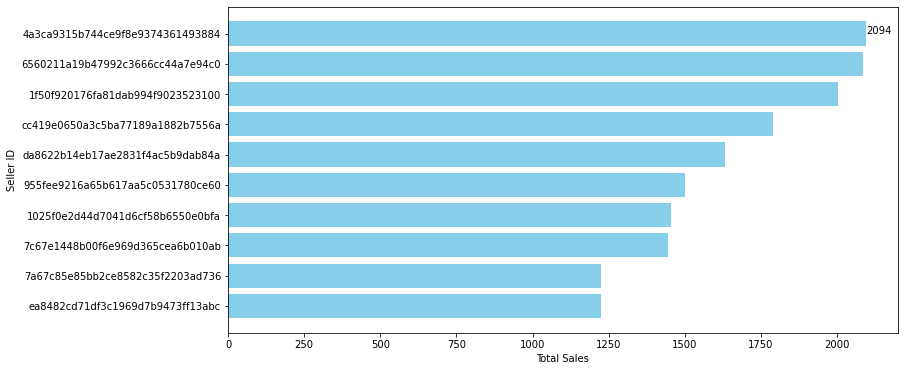

In [67]:
plt.figure(figsize=(12,6))
plt.barh(top_ten_sellers['seller_id'].head(10), top_ten_sellers['total_sales'].head(10), color='skyblue')
plt.text(top_ten_sellers['total_sales'].values[0], top_ten_sellers['seller_id'].values[0], f"{top_ten_sellers['total_sales'].values[0]}")
plt.ylabel('Seller ID')
plt.xlabel('Total Sales')
plt.gca().invert_yaxis()
plt.show()

Insight:
- Seller with ID 4a3ca9315b744ce9f8e9374361493884 and total sales 2094 is from ibitinga and 6560211a19b47992c3666cc44a7e94c0 as the second place from sao paulo which they both is also came from the same state Sao Paulo, the highest state revenue. 
- cama_mesa_banho becomes the top selling 4a3ca9315b744ce9f8e9374361493884, with 482 total orders
- Top 10 seller are mostly from Sao Paulo

# Conclusion

- Revenue and Regional Trends:
Sao Paulo (SP) emerged as the highest revenue-generating state, aligning with its status as Brazil's most populous state. Rio de Janeiro(RJ) as the third most populated state in Brazil is in the second position with highest revenue. Notably, while Minas Gerais (MG) is the second most populous, it ranked third in revenue, highlighting potential variations in purchasing power or preferences across regions. The analysis also identified a daily revenue peak on 2017-11-24, suggesting the influence of specific events or promotions.
- Purchase Timing:
Customer purchase behavior showed a clear trend, peaking at 16:00 with 8039 purchases. An upward trend was observed during morning hours (6:00-11:00) and a downward trend post-21:00, suggesting the influence of daily routines and work schedules on online shopping habits.
- Product Preferences:
"cama_mesa_banho" (bed_bath_table), primarily home equipment products, emerged as the most purchased category with 11823 purchases. This highlights the significance of home-related products in the Brazilian e-commerce market.
- Seller Performance:
The seller with ID "4a3ca9315b744ce9f8e9374361493884" based in Sao Paulo State achieved the highest sales, totaling 2094 orders. This suggests a correlation between seller location and performance, aligning with the regional revenue trends. cama_mesa_banho were the top-selling product category for this seller.

By this analysis we can leverage regional insight to make a data-driven campaigns focusing on the high-revenue states or creating a campaigns to make seller climbing the ladder.